## Supervised Learning
## Project: Finding Donors for *CharityML*

### Getting Started

In this project, I will employ several supervised algorithms of my choice to accurately model individuals' income using data collected from the 1994 U.S. Census. I will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. My goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames

%load_ext nb_black
%matplotlib inline

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


<IPython.core.display.Javascript object>

### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# Total number of records
n_records = data.shape[0]

# Number of records where individual's income is more than $50,000
n_greater_50k = sum(data.income == ">50K")

# Number of records where individual's income is at most $50,000
n_at_most_50k = sum(data.income == "<=50K")

# Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k / (n_greater_50k + n_at_most_50k)) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


<IPython.core.display.Javascript object>

** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Normalizing Numerical Features
May some data of a feature is skewed, so we have outliers and these points affect badly on our model .I decided to use one of scaling methods which is MinMaxScaler. MinMax doesn't change the information of any data point and also it is very useful for our classical machine learning models which using the distance between points for training.

In [3]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()  # default=(0, 1)
numerical = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

features_log_minmax_transform = pd.DataFrame(data=data)
features_log_minmax_transform[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba,<=50K


<IPython.core.display.Javascript object>

### Implementation: Data Preprocessing

We Use OHE( one hot encoding) for our colum with more than 2 classes and le(Labale ecoder) for our binary classes.

In [4]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
cat_cal = data.select_dtypes(include=["object"]).columns
le_data = data.copy()
for i in cat_cal:
    if len(le_data[i].unique()) <= 2:
        le_data[i] = le.fit_transform(le_data[i])
features_final = pd.get_dummies(le_data)

<IPython.core.display.Javascript object>

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [5]:
cor = features_final.corr()["income"].sort_values()
cor.head(), cor.tail()

(marital-status_ Never-married   -0.319536
 relationship_ Own-child         -0.222635
 relationship_ Not-in-family     -0.195561
 occupation_ Other-service       -0.165428
 relationship_ Unmarried         -0.147262
 Name: income, dtype: float64, age                                   0.237040
 education-num                         0.332800
 relationship_ Husband                 0.403706
 marital-status_ Married-civ-spouse    0.446192
 income                                1.000000
 Name: income, dtype: float64)

<IPython.core.display.Javascript object>

In [6]:
important_features = [value for key, value in zip(cor, cor.keys()) if abs(key) > 0.1]

<IPython.core.display.Javascript object>

In [7]:
features = features_final[important_features].drop(["income"], axis=1)
income = features_final[important_features]["income"]

<IPython.core.display.Javascript object>

In [158]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, income, test_size=0.2, random_state=42
)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
X_train.head()

Training set has 36177 samples.
Testing set has 9045 samples.


,marital-status_ Never-married,relationship_ Own-child,relationship_ Not-in-family,occupation_ Other-service,relationship_ Unmarried,education_level_ HS-grad,marital-status_ Divorced,workclass_ Private,relationship_ Wife,education_level_ Doctorate,...,education_level_ Bachelors,occupation_ Prof-specialty,occupation_ Exec-managerial,sex,capital-gain,hours-per-week,age,education-num,relationship_ Husband,marital-status_ Married-civ-spouse
7963,1,0,1,0,0,0,0,1,0,0,...,1,0,1,0,0.0,0.397959,0.205479,0.800000,0,0
26402,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0.0,0.663265,0.383562,0.733333,1,1
31411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.0,0.500000,0.383562,0.400000,1,1
13367,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0.0,0.704082,0.301370,0.533333,1,1
38742,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0.0,0.377551,0.465753,0.533333,0,0


<IPython.core.display.Javascript object>

----
## Evaluating Model Performance


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [43]:
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    """
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    """
    beta = 0.5
    results = {}

    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time()  # Get start time
    learner.fit(X_train, y_train)
    end = time()  # Get end time
    # Calculate the training time
    results["train_time"] = end - start

    # Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time()  # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time()  # Get end time

    # Calculate the total prediction time
    results["test_time"] = end - start

    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results["acc_train"] = accuracy_score(y_train, predictions_train)

    # Compute accuracy on test set using accuracy_score()
    results["acc_test"] = accuracy_score(y_test, predictions_test)

    # Compute F-score on the the first 300 training samples using fbeta_score()
    results["f_train"] = fbeta_score(y_train, predictions_train, beta=beta)

    # Compute F-score on the test set which is y_test
    results["f_test"] = fbeta_score(y_test, predictions_test, beta=beta)

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))

    # Return the results
    return results

<IPython.core.display.Javascript object>

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [159]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = SVC(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)
clf_D = XGBClassifier(random_state=42)
clf_E = LGBMClassifier(random_state=42)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results1 = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results1[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results1[clf_name][i] = train_predict(
            clf, samples, X_train, y_train, X_test, y_test
        )

# Run metrics visualization for the three supervised learning models chosen
# vs.evaluate(results, accuracy, fscore)

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
XGBClassifier trained on 361 samples.
XGBClassifier trained on 3617 samples.
XGBClassifier trained on 36177 samples.
LGBMClassifier trained on 361 samples.
LGBMClassifier trained on 3617 samples.
LGBMClassifier trained on 36177 samples.


<IPython.core.display.Javascript object>

In [150]:
variable = {"model": [], "variable": [], "value": []}
for i in results1.keys():
    for j in results1[i]:
        for z in results1[i][j]:
            variable["model"].append(i)
            variable["variable"].append(z)
            variable["value"].append(results1[i][j][z])
df1 = pd.DataFrame(variable)
df1.head()

,model,variable,value
0,GaussianNB,train_time,0.183772
1,GaussianNB,test_time,0.105744
2,GaussianNB,acc_train,0.627277
3,GaussianNB,acc_test,0.635489
4,GaussianNB,f_train,0.442006


<IPython.core.display.Javascript object>

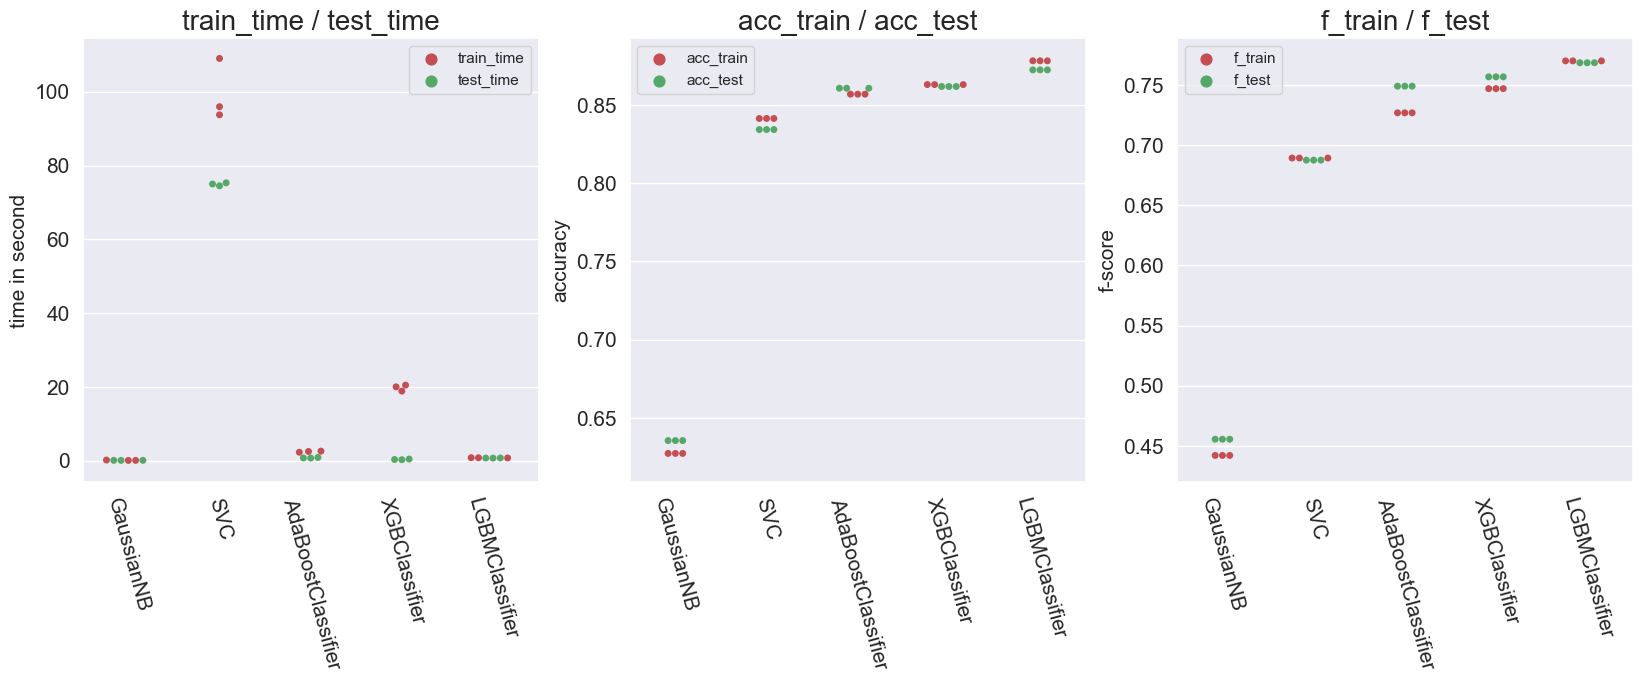

<IPython.core.display.Javascript object>

In [151]:
fig = plt.figure(dpi=100, figsize=(20, 20))
y_ax = [
    ["train_time", "test_time", "time in second"],
    ["acc_train", "acc_test", "accuracy"],
    ["f_train", "f_test", "f-score"],
]
for i in range(3):
    ax = fig.add_subplot(331 + i)
    plt.title(y_ax[i][0] + " / " + y_ax[i][1], size=20)
    rf = df1[(df1["variable"] == y_ax[i][0]) | (df1["variable"] == y_ax[i][1])]
    sns.swarmplot(
        data=rf, x="model", y="value", hue="variable", palette=["r", "g"],
    )
    plt.legend()
    plt.ylabel(y_ax[i][2], fontsize=15)
    plt.xlabel("")
    plt.xticks(rotation=-75, size=15)
    plt.yticks(size=15)

plt.show()

In the above investigate five classification models were evaluated. The best model is Light gradient boost in both accuracy and f-score metrics. In the training time we see that SVC performs awful .
so we go farther to see with model do the best in timing measure

and also assume LGBM slighty tends to overfit maybe in different datasets so you should be careful and better to tune the model

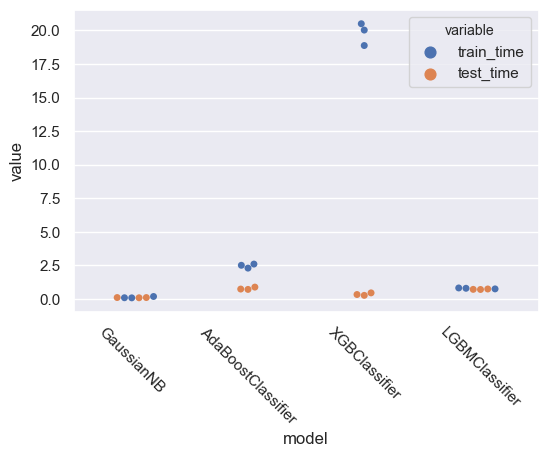

<IPython.core.display.Javascript object>

In [152]:
rf = df1[(df1["variable"] == "test_time") | (df1["variable"] == "train_time")]

plt.figure(dpi=100)
sns.swarmplot(data=rf[rf.model != "SVC"], x="model", y="value", hue="variable")
plt.xticks(rotation=-45)
plt.show()

the best model in training time is Gussain and lgbm respectively

###### Say we've used the models wihtout any tuning so they should be act difference with using hyper parameter

I want to do all this levels with all features

In [141]:
X_train, X_test, y_train, y_test = train_test_split(
    features_final.drop(["income"], axis=1), income, test_size=0.2, random_state=42
)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))
X_train.head()

Training set has 36177 samples.
Testing set has 9045 samples.


,age,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
7963,0.205479,0.800000,0,0.0,0.0,0.397959,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26402,0.383562,0.733333,1,0.0,0.0,0.663265,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31411,0.383562,0.400000,1,0.0,0.0,0.500000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
13367,0.301370,0.533333,1,0.0,0.0,0.704082,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
38742,0.465753,0.533333,0,0.0,0.0,0.377551,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<IPython.core.display.Javascript object>

In [142]:
clf_A = GaussianNB()
clf_B = SVC(random_state=42)
clf_C = AdaBoostClassifier(random_state=42)
clf_D = XGBClassifier(random_state=42)
clf_E = LGBMClassifier(random_state=42)


# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(0.1 * len(y_train))
samples_1 = int(0.01 * len(y_train))

# Collect results on the learners
results2 = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    clf_name = clf.__class__.__name__
    results2[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results2[clf_name][i] = train_predict(
            clf, samples, X_train, y_train, X_test, y_test
        )


GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
SVC trained on 361 samples.
SVC trained on 3617 samples.
SVC trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.
XGBClassifier trained on 361 samples.
XGBClassifier trained on 3617 samples.
XGBClassifier trained on 36177 samples.
LGBMClassifier trained on 361 samples.
LGBMClassifier trained on 3617 samples.
LGBMClassifier trained on 36177 samples.


<IPython.core.display.Javascript object>

In [143]:
variable = {"model": [], "variable": [], "value": []}
for i in results2.keys():
    for j in results2[i]:
        for z in results2[i][j]:
            variable["model"].append(i)
            variable["variable"].append(z)
            variable["value"].append(results2[i][j][z])
df1 = pd.DataFrame(variable)
df1.head()

,model,variable,value
0,GaussianNB,train_time,0.138221
1,GaussianNB,test_time,0.118232
2,GaussianNB,acc_train,0.627277
3,GaussianNB,acc_test,0.635489
4,GaussianNB,f_train,0.442006


<IPython.core.display.Javascript object>

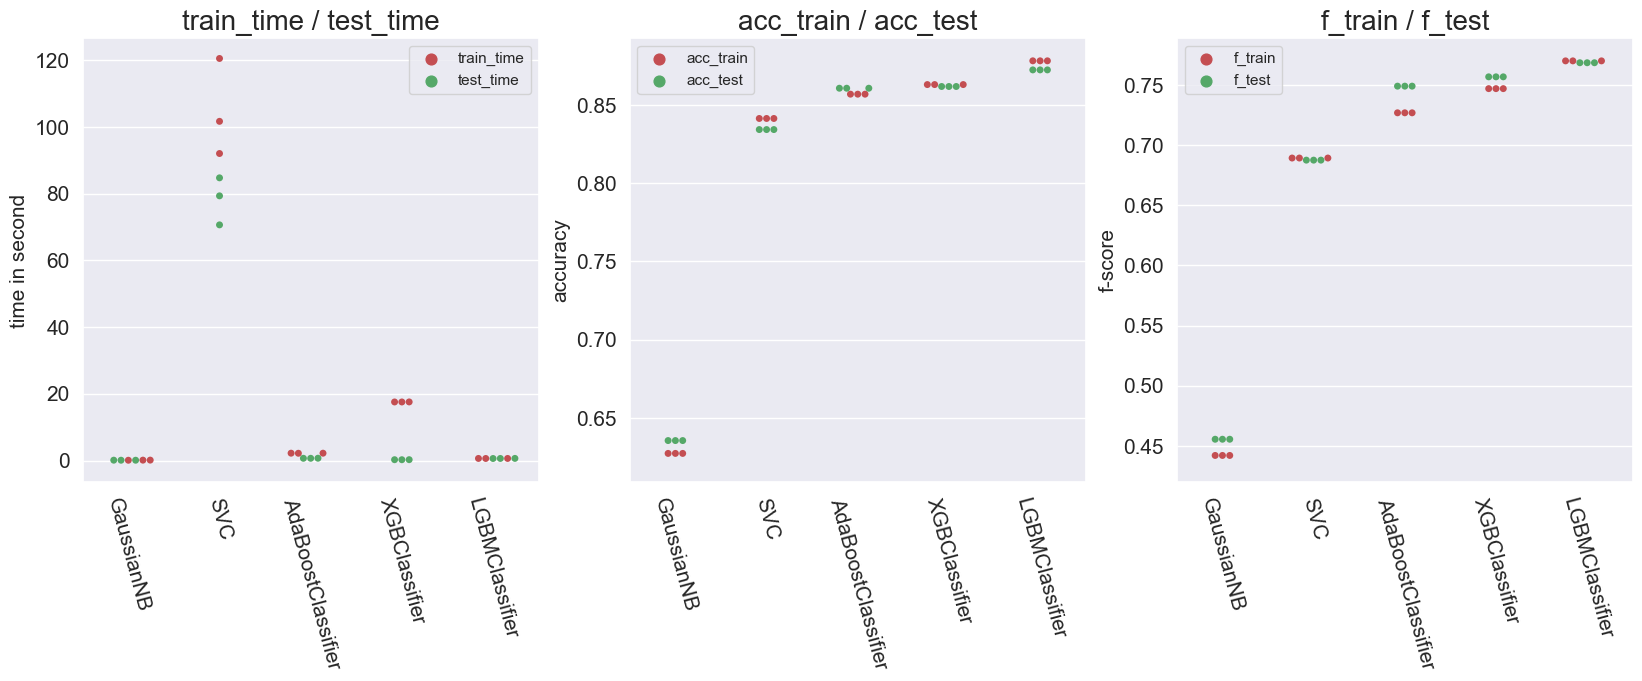

<IPython.core.display.Javascript object>

In [146]:
fig = plt.figure(dpi=100, figsize=(20, 20))
y_ax = [
    ["train_time", "test_time", "time in second"],
    ["acc_train", "acc_test", "accuracy"],
    ["f_train", "f_test", "f-score"],
]
for i in range(3):
    ax = fig.add_subplot(331 + i)
    plt.title(y_ax[i][0] + " / " + y_ax[i][1], size=20)
    rf = df1[(df1["variable"] == y_ax[i][0]) | (df1["variable"] == y_ax[i][1])]
    sns.swarmplot(
        data=rf, x="model", y="value", hue="variable", palette=["r", "g"],
    )
    plt.legend()
    plt.ylabel(y_ax[i][2], fontsize=15)
    plt.xlabel("")
    plt.xticks(rotation=-75, size=15)
    plt.yticks(size=15)

plt.show()

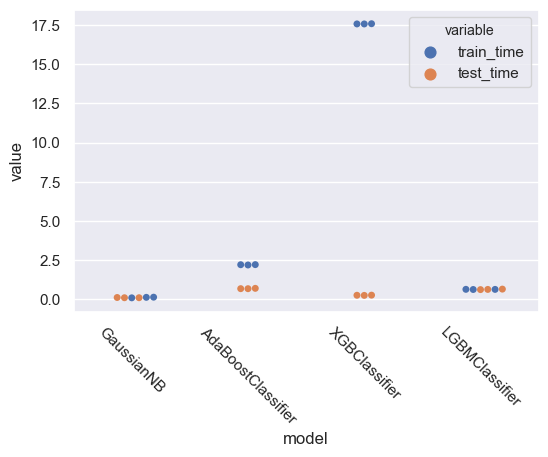

<IPython.core.display.Javascript object>

In [147]:
rf = df1[(df1["variable"] == "test_time") | (df1["variable"] == "train_time")]

plt.figure(dpi=100)
sns.swarmplot(data=rf[rf.model != "SVC"], x="model", y="value", hue="variable")
plt.xticks(rotation=-45)
plt.show()

there is no meaningful difference in accurcy and f-score with relative features and all featuers but in all features the process takes very great time so it is definitely not recommended in this projecgt
